## HW11
### Problem 1 

In [84]:
import scipy.io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

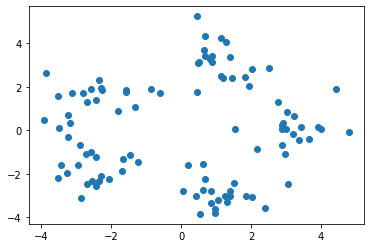

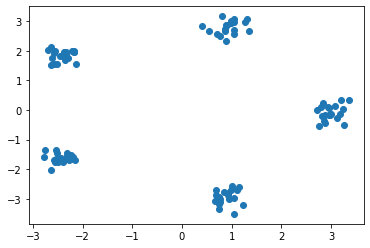

In [89]:
data = scipy.io.loadmat("11HW1_KmeanData.mat")
X = data["X"].transpose()
Y = data["Y"].transpose()


plt.scatter(X[:,0], X[:,1])
plt.show()
plt.scatter(Y[:,0], Y[:,1])
plt.show()

# plt.scatter(X, Y)
# plt.show()


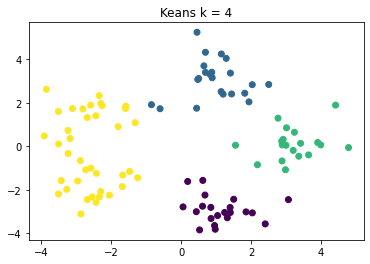

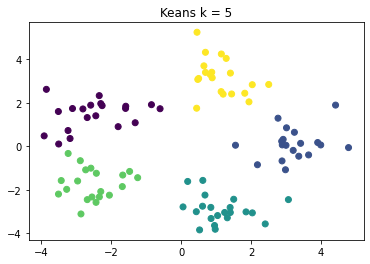

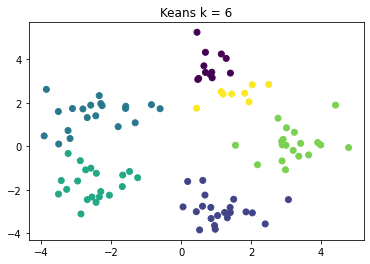

In [86]:
k = [4, 5 ,6]
for i in k:
    KM = KMeans(n_clusters=i, init='random', random_state=5)
    KM.fit(X)
    KM.predict(X)
    plt.scatter(X[:,0],X[:,1],c=KM.predict(X))
    plt.title(f"Keans k = {i}")
    plt.show()

### Problem 2 (k-means)

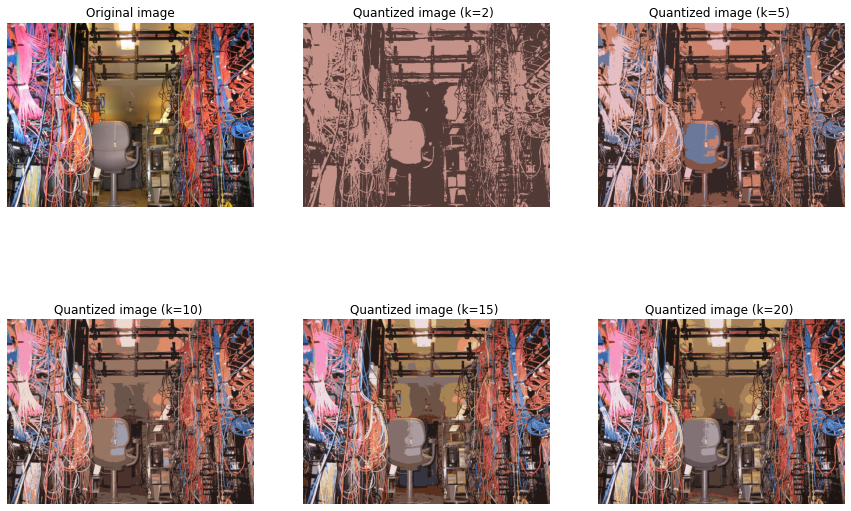

In [87]:
from sklearn.utils import shuffle

original = cv2.imread("11HW2_PatchPanels.jpg")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB) 
width,height,depth = original.shape
temp = original.reshape(width*height,depth)
temp = np.array(temp, dtype=np.float64) / 255

original_sample = shuffle(temp, random_state=0)[:1000] # random 1000 points
def cluster(k):
    estimator = KMeans(n_clusters=k, random_state=0)
    kmeans = estimator.fit(original_sample)
    return kmeans

def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

kmeans = cluster(2)
labels = kmeans.predict(temp)
kmeans_2 = recreate_image(kmeans.cluster_centers_, labels,width,height)
kmeans = cluster(5)
labels = kmeans.predict(temp)
kmeans_5 = recreate_image(kmeans.cluster_centers_, labels,width,height)
kmeans = cluster(10)
labels = kmeans.predict(temp)
kmeans_10 = recreate_image(kmeans.cluster_centers_, labels,width,height)
kmeans = cluster(15)
labels = kmeans.predict(temp)
kmeans_15 = recreate_image(kmeans.cluster_centers_, labels,width,height)
kmeans = cluster(20)
labels = kmeans.predict(temp)
kmeans_20 = recreate_image(kmeans.cluster_centers_, labels,width,height)

plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
plt.axis('off')
plt.title('Original image')
plt.imshow(original.reshape(width,height,depth))

plt.subplot(2,3,2)
plt.axis('off')
plt.title('Quantized image (k=2) ')
plt.imshow(kmeans_2)

plt.subplot(2,3,3)
plt.axis('off')
plt.title('Quantized image (k=5) ')
plt.imshow(kmeans_5)

plt.subplot(2,3,4)
plt.axis('off')
plt.title('Quantized image (k=10) ')
plt.imshow(kmeans_10)

plt.subplot(2,3,5)
plt.axis('off')
plt.title('Quantized image (k=15) ')
plt.imshow(kmeans_15)

plt.subplot(2,3,6)
plt.axis('off')
plt.title('Quantized image (k=20) ')
plt.imshow(kmeans_20)

plt.show()

### (b.)

In [88]:
# Calculate the compression ratio
k = [2, 5, 10, 15, 20]

compression_ratio = original.nbytes / kmeans_2.nbytes
print(f"k = 2,  compression_ratio: {compression_ratio}")
compression_ratio = original.nbytes / kmeans_5.nbytes
print(f"k = 5,  compression_ratio: {compression_ratio}")
compression_ratio = original.nbytes / kmeans_10.nbytes
print(f"k = 10, compression_ratio: {compression_ratio}")
compression_ratio = original.nbytes / kmeans_15.nbytes
print(f"k = 15, compression_ratio: {compression_ratio}")
compression_ratio = original.nbytes / kmeans_20.nbytes
print(f"k = 20, compression_ratio: {compression_ratio}")


k = 2,  compression_ratio: 0.125
k = 5,  compression_ratio: 0.125
k = 10, compression_ratio: 0.125
k = 15, compression_ratio: 0.125
k = 20, compression_ratio: 0.125


這部分不確定為甚麼計算出來的壓縮比始終都是0.125，數值沒有差距但根據照片應是有實際效用的，這部分還需要再調整

### (C.)
若是要以圖片壓縮為目的，並且不要改變太多圖片的性質的話，我認為k=10是一個臨界點，低於10有很大的色彩斷層，明顯看得出來分界，而大於10的部分則相對差異沒那麼大，比較類似圖片調整的風格不同，因此我會選擇10